In [1]:
# Importing the libraries
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import roc_curve, auc, confusion_matrix, classification_report,accuracy_score
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier

In [2]:
#Reading the dataset
kidney = pd.read_csv("../input/kidney_disease.csv")
kidney.head()

,id,age,bp,sg,al,su,rbc,pc,pcc,ba,...,pcv,wc,rc,htn,dm,cad,appet,pe,ane,classification
0,0,48.0,80.0,1.020,1.0,0.0,NaN,normal,notpresent,notpresent,...,44,7800,5.2,yes,yes,no,good,no,no,ckd
1,1,7.0,50.0,1.020,4.0,0.0,NaN,normal,notpresent,notpresent,...,38,6000,NaN,no,no,no,good,no,no,ckd
2,2,62.0,80.0,1.010,2.0,3.0,normal,normal,notpresent,notpresent,...,31,7500,NaN,no,yes,no,poor,no,yes,ckd
3,3,48.0,70.0,1.005,4.0,0.0,normal,abnormal,present,notpresent,...,32,6700,3.9,yes,no,no,poor,yes,yes,ckd
4,4,51.0,80.0,1.010,2.0,0.0,normal,normal,notpresent,notpresent,...,35,7300,4.6,no,no,no,good,no,no,ckd


In [3]:
# Information about the dataset
kidney.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 26 columns):
id                400 non-null int64
age               391 non-null float64
bp                388 non-null float64
sg                353 non-null float64
al                354 non-null float64
su                351 non-null float64
rbc               248 non-null object
pc                335 non-null object
pcc               396 non-null object
ba                396 non-null object
bgr               356 non-null float64
bu                381 non-null float64
sc                383 non-null float64
sod               313 non-null float64
pot               312 non-null float64
hemo              348 non-null float64
pcv               330 non-null object
wc                295 non-null object
rc                270 non-null object
htn               398 non-null object
dm                398 non-null object
cad               398 non-null object
appet             399 non-null object
pe         

In [4]:
# Description of the dataset
kidney.describe()

,id,age,bp,sg,al,su,bgr,bu,sc,sod,pot,hemo
count,400.000000,391.000000,388.000000,353.000000,354.000000,351.000000,356.000000,381.000000,383.000000,313.000000,312.000000,348.000000
mean,199.500000,51.483376,76.469072,1.017408,1.016949,0.450142,148.036517,57.425722,3.072454,137.528754,4.627244,12.526437
std,115.614301,17.169714,13.683637,0.005717,1.352679,1.099191,79.281714,50.503006,5.741126,10.408752,3.193904,2.912587
min,0.000000,2.000000,50.000000,1.005000,0.000000,0.000000,22.000000,1.500000,0.400000,4.500000,2.500000,3.100000
25%,99.750000,42.000000,70.000000,1.010000,0.000000,0.000000,99.000000,27.000000,0.900000,135.000000,3.800000,10.300000
50%,199.500000,55.000000,80.000000,1.020000,0.000000,0.000000,121.000000,42.000000,1.300000,138.000000,4.400000,12.650000
75%,299.250000,64.500000,80.000000,1.020000,2.000000,0.000000,163.000000,66.000000,2.800000,142.000000,4.900000,15.000000
max,399.000000,90.000000,180.000000,1.025000,5.000000,5.000000,490.000000,391.000000,76.000000,163.000000,47.000000,17.800000


In [5]:
# To see what are the column names in our dataset
print(kidney.columns)

Index(['id', 'age', 'bp', 'sg', 'al', 'su', 'rbc', 'pc', 'pcc', 'ba', 'bgr',
       'bu', 'sc', 'sod', 'pot', 'hemo', 'pcv', 'wc', 'rc', 'htn', 'dm', 'cad',
       'appet', 'pe', 'ane', 'classification'],
      dtype='object')


In [6]:
# Mapping the text to 1/0 and cleaning the dataset 
kidney[['htn','dm','cad','pe','ane']] = kidney[['htn','dm','cad','pe','ane']].replace(to_replace={'yes':1,'no':0})
kidney[['rbc','pc']] = kidney[['rbc','pc']].replace(to_replace={'abnormal':1,'normal':0})
kidney[['pcc','ba']] = kidney[['pcc','ba']].replace(to_replace={'present':1,'notpresent':0})
kidney[['appet']] = kidney[['appet']].replace(to_replace={'good':1,'poor':0,'no':np.nan})
kidney['classification'] = kidney['classification'].replace(to_replace={'ckd':1.0,'ckd\t':1.0,'notckd':0.0,'no':0.0})
kidney.rename(columns={'classification':'class'},inplace=True)

kidney['pe'] = kidney['pe'].replace(to_replace='good',value=0) # Not having pedal edema is good
kidney['appet'] = kidney['appet'].replace(to_replace='no',value=0)
kidney['cad'] = kidney['cad'].replace(to_replace='\tno',value=0)
kidney['dm'] = kidney['dm'].replace(to_replace={'\tno':0,'\tyes':1,' yes':1, '':np.nan})
kidney.drop('id',axis=1,inplace=True)

In [7]:
kidney.head()

,age,bp,sg,al,su,rbc,pc,pcc,ba,bgr,...,pcv,wc,rc,htn,dm,cad,appet,pe,ane,class
0,48.0,80.0,1.020,1.0,0.0,NaN,0.0,0.0,0.0,121.0,...,44,7800,5.2,1.0,1.0,0.0,1.0,0.0,0.0,1.0
1,7.0,50.0,1.020,4.0,0.0,NaN,0.0,0.0,0.0,NaN,...,38,6000,NaN,0.0,0.0,0.0,1.0,0.0,0.0,1.0
2,62.0,80.0,1.010,2.0,3.0,0.0,0.0,0.0,0.0,423.0,...,31,7500,NaN,0.0,1.0,0.0,0.0,0.0,1.0,1.0
3,48.0,70.0,1.005,4.0,0.0,0.0,1.0,1.0,0.0,117.0,...,32,6700,3.9,1.0,0.0,0.0,0.0,1.0,1.0,1.0
4,51.0,80.0,1.010,2.0,0.0,0.0,0.0,0.0,0.0,106.0,...,35,7300,4.6,0.0,0.0,0.0,1.0,0.0,0.0,1.0


In [8]:
# This helps us to count how many NaN are there in each column
len(kidney)-kidney.count()

age        9
bp        12
sg        47
al        46
su        49
rbc      152
pc        65
pcc        4
ba         4
bgr       44
bu        19
sc        17
sod       87
pot       88
hemo      52
pcv       70
wc       105
rc       130
htn        2
dm         2
cad        2
appet      1
pe         1
ane        1
class      0
dtype: int64

In [9]:
# This shows number of rows with missing data
kidney.isnull().sum(axis = 1)

0       3
1       5
2       3
3       0
4       2
5       2
6       3
7       3
8       2
9       0
10      5
11      0
12      1
13      8
14      0
15      1
16      4
17      8
18      1
19      3
20      0
21      7
22      0
23     10
24      1
25      1
26      1
27      0
28      9
29      5
       ..
370     0
371     0
372     0
373     0
374     0
375     0
376     0
377     0
378     2
379     0
380     0
381     2
382     0
383     0
384     0
385     0
386     0
387     0
388     0
389     0
390     0
391     0
392     0
393     0
394     0
395     0
396     0
397     0
398     0
399     0
Length: 400, dtype: int64

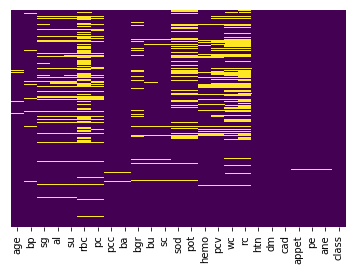

In [10]:
#This is a visualization of missing data in the dataset
sns.heatmap(kidney.isnull(),yticklabels=False,cbar=False,cmap='viridis')

In [11]:
# This shows number of complete cases and also removes all the rows with NaN
kidney2 = kidney.dropna()
print(kidney2.shape)

(158, 25)


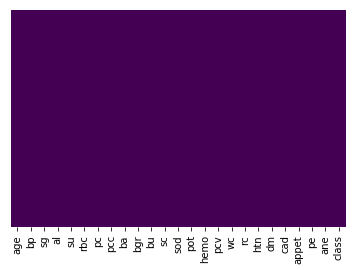

In [12]:
# Now our dataset is clean
sns.heatmap(kidney2.isnull(),yticklabels=False,cbar=False,cmap='viridis')

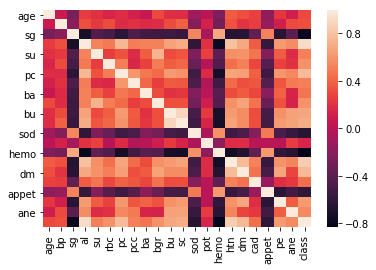

In [13]:
sns.heatmap(kidney2.corr())

AxesSubplot(0.125,0.125;0.775x0.755)


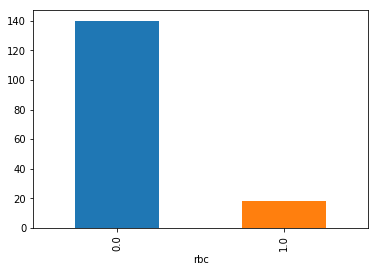

In [14]:
# Counting number of normal vs. abnormal red blood cells of people having chronic kidney disease
print(kidney2.groupby('rbc').rbc.count().plot(kind="bar"))

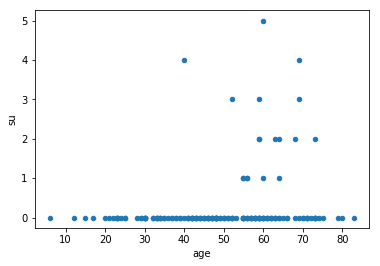

In [15]:
#This plot shows the patient's sugar level compared to their ages
kidney2.plot(kind='scatter', x='age',y='su');
plt.show()

In [16]:
# Shows the maximum blood pressure having chronic kidney disease
print(kidney2.groupby('class').bp.max())

class
0.0     80.0
1.0    110.0
Name: bp, dtype: float64


In [17]:
print(kidney2['dm'].value_counts(dropna=False))

0.0    130
1.0     28
Name: dm, dtype: int64


In [18]:
X_train, X_test, y_train, y_test = train_test_split(kidney2.iloc[:,:-1], kidney2['class'], test_size=0.33, random_state=44, stratify= kidney2['class'])

In [19]:
print(X_train.shape)

(105, 24)


In [20]:
y_train.value_counts()

0.0    76
1.0    29
Name: class, dtype: int64

In [21]:
rfc = RandomForestClassifier(random_state = 22)
rfc_fit = rfc.fit(X_train,y_train)

/opt/conda/lib/python3.6/site-packages/sklearn/ensemble/forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


In [22]:
rfc_pred = rfc_fit.predict(X_test)

In [23]:
print(confusion_matrix(y_test,rfc_pred))

[[39  0]
 [ 0 14]]


In [24]:
print(classification_report(y_test,rfc_pred))

              precision    recall  f1-score   support

         0.0       1.00      1.00      1.00        39
         1.0       1.00      1.00      1.00        14

    accuracy                           1.00        53
   macro avg       1.00      1.00      1.00        53
weighted avg       1.00      1.00      1.00        53



In [25]:
accuracy_score( y_test, rfc_pred)

1.0

In [26]:
knn = KNeighborsClassifier(n_neighbors=1)

In [27]:
knn.fit(X_train,y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=1, p=2,
                     weights='uniform')

In [28]:
pred = knn.predict(X_test)

In [29]:
print(confusion_matrix(y_test,pred))

[[39  0]
 [ 6  8]]


In [30]:
print(classification_report(y_test,pred))

              precision    recall  f1-score   support

         0.0       0.87      1.00      0.93        39
         1.0       1.00      0.57      0.73        14

    accuracy                           0.89        53
   macro avg       0.93      0.79      0.83        53
weighted avg       0.90      0.89      0.88        53



In [31]:
accuracy_score( y_test,pred)

0.8867924528301887

In [32]:
logmodel = LogisticRegression()
logmodel.fit(X_train,y_train)

/opt/conda/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=None, solver='warn', tol=0.0001, verbose=0,
                   warm_start=False)

In [33]:
predictions = logmodel.predict(X_test)

In [34]:
print(classification_report(y_test,predictions))

              precision    recall  f1-score   support

         0.0       1.00      1.00      1.00        39
         1.0       1.00      1.00      1.00        14

    accuracy                           1.00        53
   macro avg       1.00      1.00      1.00        53
weighted avg       1.00      1.00      1.00        53



In [35]:
print(confusion_matrix(y_test,predictions))

[[39  0]
 [ 0 14]]


In [36]:
accuracy_score( y_test, predictions)

1.0

In [37]:
feature_importances = pd.DataFrame(rfc.fit(X_train,y_train).feature_importances_, index = X_train.columns,
                                   columns=['importance']).sort_values('importance', ascending=False)
print(feature_importances)

       importance
rc       0.185719
sg       0.157570
hemo     0.126237
sc       0.116827
al       0.113034
pc       0.067593
pcv      0.067506
bgr      0.060467
htn      0.056452
sod      0.043548
bu       0.005048
wc       0.000000
pe       0.000000
appet    0.000000
cad      0.000000
dm       0.000000
age      0.000000
pot      0.000000
bp       0.000000
ba       0.000000
pcc      0.000000
rbc      0.000000
su       0.000000
ane      0.000000


In [38]:
kidney3 = kidney.drop(columns=['rbc', 'pc', 'sod', 'pot', 'pcv', 'wc', 'rc'])
kidney3. shape

(400, 18)

In [39]:
kidney3.head()

,age,bp,sg,al,su,pcc,ba,bgr,bu,sc,hemo,htn,dm,cad,appet,pe,ane,class
0,48.0,80.0,1.020,1.0,0.0,0.0,0.0,121.0,36.0,1.2,15.4,1.0,1.0,0.0,1.0,0.0,0.0,1.0
1,7.0,50.0,1.020,4.0,0.0,0.0,0.0,NaN,18.0,0.8,11.3,0.0,0.0,0.0,1.0,0.0,0.0,1.0
2,62.0,80.0,1.010,2.0,3.0,0.0,0.0,423.0,53.0,1.8,9.6,0.0,1.0,0.0,0.0,0.0,1.0,1.0
3,48.0,70.0,1.005,4.0,0.0,1.0,0.0,117.0,56.0,3.8,11.2,1.0,0.0,0.0,0.0,1.0,1.0,1.0
4,51.0,80.0,1.010,2.0,0.0,0.0,0.0,106.0,26.0,1.4,11.6,0.0,0.0,0.0,1.0,0.0,0.0,1.0


In [40]:
kidney3.isnull().sum()

age       9
bp       12
sg       47
al       46
su       49
pcc       4
ba        4
bgr      44
bu       19
sc       17
hemo     52
htn       2
dm        2
cad       2
appet     1
pe        1
ane       1
class     0
dtype: int64

In [41]:
kidney3.mode()

,age,bp,sg,al,su,pcc,ba,bgr,bu,sc,hemo,htn,dm,cad,appet,pe,ane,class
0,60.0,80.0,1.02,0.0,0.0,0.0,0.0,99.0,46.0,1.2,15.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0


In [42]:
# Fill in the NaNs with the mode for each column.   
kidney3_imp = kidney3.apply(lambda x:x.fillna(x.value_counts().index[0]))

In [43]:
kidney3_imp.isnull().sum()

age      0
bp       0
sg       0
al       0
su       0
pcc      0
ba       0
bgr      0
bu       0
sc       0
hemo     0
htn      0
dm       0
cad      0
appet    0
pe       0
ane      0
class    0
dtype: int64

In [44]:
X_train, X_test, y_train, y_test = train_test_split(kidney3_imp.iloc[:,:-1], kidney3_imp['class'],
                                                    test_size = 0.33, random_state=44,
                                                   stratify = kidney3_imp['class'])

In [45]:
y_train.value_counts()

1.0    168
0.0    100
Name: class, dtype: int64

In [46]:
rfc = RandomForestClassifier(random_state = 22)
rfc_fit = rfc.fit(X_train,y_train)

/opt/conda/lib/python3.6/site-packages/sklearn/ensemble/forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


In [47]:
rfc_pred = rfc_fit.predict(X_test)

In [48]:
print(confusion_matrix(y_test,rfc_pred))

[[50  0]
 [ 0 82]]


In [49]:
print(classification_report(y_test,rfc_pred))

              precision    recall  f1-score   support

         0.0       1.00      1.00      1.00        50
         1.0       1.00      1.00      1.00        82

    accuracy                           1.00       132
   macro avg       1.00      1.00      1.00       132
weighted avg       1.00      1.00      1.00       132



In [50]:
accuracy_score( y_test, rfc_pred)

1.0

In [51]:
logmodel = LogisticRegression()
logmodel.fit(X_train,y_train)

/opt/conda/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=None, solver='warn', tol=0.0001, verbose=0,
                   warm_start=False)

In [52]:
predictions = logmodel.predict(X_test)

In [53]:
print(classification_report(y_test,predictions))

              precision    recall  f1-score   support

         0.0       0.96      0.98      0.97        50
         1.0       0.99      0.98      0.98        82

    accuracy                           0.98       132
   macro avg       0.97      0.98      0.98       132
weighted avg       0.98      0.98      0.98       132



In [54]:
print(confusion_matrix(y_test,predictions))

[[49  1]
 [ 2 80]]


In [55]:
accuracy_score( y_test, rfc_pred)

1.0

In [56]:
dtree=DecisionTreeClassifier()

In [57]:
dtree.fit(X_train,y_train)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
                       max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort=False,
                       random_state=None, splitter='best')

In [58]:
predictions=dtree.predict(X_test)

In [59]:
print(classification_report(y_test,predictions))

              precision    recall  f1-score   support

         0.0       0.98      1.00      0.99        50
         1.0       1.00      0.99      0.99        82

    accuracy                           0.99       132
   macro avg       0.99      0.99      0.99       132
weighted avg       0.99      0.99      0.99       132



In [60]:
from IPython.display import Image
from sklearn.externals.six import StringIO
from sklearn.tree import export_graphviz
import pydot
import os
os.environ["PATH"] += os.pathsep + 'C:\Program Files (x86)/Graphviz2.38/bin/'

features = list(kidney3.columns[1:])
features

/opt/conda/lib/python3.6/site-packages/sklearn/externals/six.py:31: DeprecationWarning: The module is deprecated in version 0.21 and will be removed in version 0.23 since we've dropped support for Python 2.7. Please rely on the official version of six (https://pypi.org/project/six/).
  "(https://pypi.org/project/six/).", DeprecationWarning)


['bp',
 'sg',
 'al',
 'su',
 'pcc',
 'ba',
 'bgr',
 'bu',
 'sc',
 'hemo',
 'htn',
 'dm',
 'cad',
 'appet',
 'pe',
 'ane',
 'class']

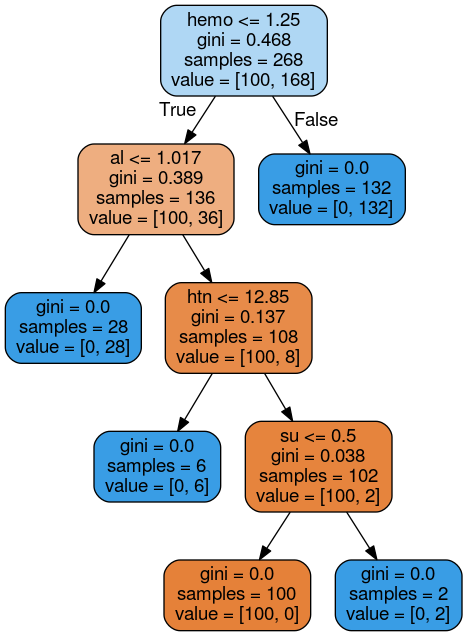

In [61]:
dot_data = StringIO()
export_graphviz(dtree, out_file = dot_data,feature_names = features,filled = True,rounded=True)

graph = pydot.graph_from_dot_data(dot_data.getvalue())
Image(graph[0].create_png())

In [62]:
rfc = RandomForestClassifier(n_estimators=100)
rfc.fit(X_train,y_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
                       max_depth=None, max_features='auto', max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [63]:
rfc_pred = rfc.predict(X_test)

In [64]:
print(confusion_matrix(y_test,rfc_pred))

[[50  0]
 [ 0 82]]


In [65]:
print(classification_report(y_test,rfc_pred))

              precision    recall  f1-score   support

         0.0       1.00      1.00      1.00        50
         1.0       1.00      1.00      1.00        82

    accuracy                           1.00       132
   macro avg       1.00      1.00      1.00       132
weighted avg       1.00      1.00      1.00       132



In [66]:
accuracy_score( y_test, rfc_pred)

1.0

In [67]:
# Choosing a K Value.
# Let's go ahead and use the elbow method to pick a good k value.
error_rate = []

# Will take some time
for i in range(1,40):
    
    knn = KNeighborsClassifier(n_neighbors=i)
    knn.fit(X_train,y_train)
    pred_i = knn.predict(X_test)
    error_rate.append(np.mean(pred_i != y_test))

Text(0, 0.5, 'Error Rate')

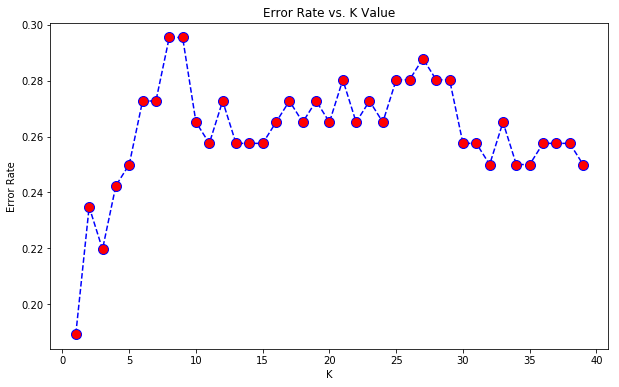

In [68]:
plt.figure(figsize=(10,6))
plt.plot(range(1,40),error_rate,color='blue', linestyle='dashed', marker='o', markerfacecolor='red',markersize=10)
plt.title('Error Rate vs. K Value')
plt.xlabel('K')
plt.ylabel('Error Rate')

In [69]:
knn = KNeighborsClassifier(n_neighbors=1)

In [70]:
knn.fit(X_train,y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=1, p=2,
                     weights='uniform')

In [71]:
pred = knn.predict(X_test)

In [72]:
print(confusion_matrix(y_test,pred))

[[43  7]
 [18 64]]


In [73]:
print(classification_report(y_test,pred))

              precision    recall  f1-score   support

         0.0       0.70      0.86      0.77        50
         1.0       0.90      0.78      0.84        82

    accuracy                           0.81       132
   macro avg       0.80      0.82      0.81       132
weighted avg       0.83      0.81      0.81       132



In [74]:
accuracy_score( y_test,pred)

0.8106060606060606